### 추가 설치 필요 라이브러리
    pip install customized_konlpy

In [1]:
from konlpy.tag import Okt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pprint

## Data import

In [2]:
df = pd.read_csv('review_crwl_RM.csv')
print("shape of dataframe : {}".format(df.shape))
df.head()

shape of dataframe : (11520, 4)


,time,review_txt,stars_txt,ratings
0,2019-05-30,핵과금: 엔씨 주 수입원(신화. 전설 ) Limit 중과금: 패키지 + 전설템 도전...,별표 5개 만점에 3개를 받았습니다.,3
1,2019-05-29,엘지전자 단말기로는 아예 겜을 하지말라는거요?거 해도해도 너무하네요. 삼성과 함께하...,별표 5개 만점에 1개를 받았습니다.,1
2,2019-06-03,김택진이를 재벌로 만들어준 게임의 모바일버전..김택진이의 재벌 욕심에 플레이어를 확...,별표 5개 만점에 1개를 받았습니다.,1
3,2019-06-01,구글포인트를 사용하여 게임내 아이템을 구매하였는데 어떤수단을 써도 인게임내 아이템 ...,별표 5개 만점에 3개를 받았습니다.,3
4,2019-05-28,일단 이건 게임이 아닙니다. 대다수의 아이템이 현금을 투입해야만 획득이 가능한 상태...,별표 5개 만점에 1개를 받았습니다.,1


In [91]:
# 원문 text의 수정
edi_tok = ['잼', '업뎃', '쓰래기','아이탬']
pro_tok = ['재미','업데이트', '쓰레기', '아이템']
df['review_txt'] = df['review_txt'].str.replace('전체 리뷰', '')
df['review_txt'] = df['review_txt'].str.replace(r'[-=+,#/\;?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》0-9]', '')
df['review_txt'] = df['review_txt'].replace(edi_tok, pro_tok,regex=True)

doc_to_mat = df['review_txt'].as_matrix()
doc_to_mat = list(doc_to_mat)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [92]:
okt = Okt()
pprint.pprint(okt.tagset)

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}


In [93]:
from ckonlpy.tag import Twitter
twitter = Twitter(use_twitter_dictionary=False)
twitter.add_dictionary(['사행성','리니지m', '핵과금', '무과금', '가챠'], 'Noun') #명사 추가 사전
twitter.add_dictionary(['갑자기','이제','다시', '계속', '역시', '지금', '아주','완전'], 'Adverb') #명사 -> 부사
twitter.add_dictionary(['이건'], 'Determiner') #명사 > 관형사
stopwords = ["이다", "있다", '진짜', '입니다', '게임','아니','하나', '정말',' 계속','그냥']
def tokenizer(raw, pos=["Noun"], stopword=stopwords): #품사 지정 
    return [
        word for word, tag in twitter.pos(raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [94]:
vectorizer = CountVectorizer(tokenizer=tokenizer, min_df=10, ngram_range=(1,2)) #tokenizer, 최소 출현문서 수, ngram 범위 uni~tri gram (최대출현문서수 추가 가능)
doc_to_vec = vectorizer.fit_transform(doc_to_mat)
print('fit_transform, (sentence {}, feature {})'.format(doc_to_vec.shape[0], doc_to_vec.shape[1]))

fit_transform, (sentence 11520, feature 724)


In [95]:
print(doc_to_vec.toarray())
features = vectorizer.get_feature_names()
#pprint.pprint(features)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [96]:
doc_to_vec_df = pd.DataFrame(doc_to_vec.toarray(), columns=features)
doc_to_vec_df.head()

,가끔,가능,가라,가면,가안,가요,가장,가지,각인,간다,...,환불,환불 요청,회사,획득,횟수,후회,휴대폰,흑기사,흑우,희귀
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [97]:
#doc_to_vec_df.to_csv('doc2vec_test.csv', index = False)

In [98]:
max_value = doc_to_vec.max(axis=0).toarray().ravel()
print(len(max_value))
sort_by_count = max_value.argsort()
features_name = np.array(vectorizer.get_feature_names())

724


In [99]:
tokencnt = doc_to_vec_df.sum(axis=0)
tokencnt = tokencnt.sort_values()
print("상위 빈도 token 50개 : \n {}".format(tokencnt[-50:]))

상위 빈도 token 50개 : 
 변신       127
영변       130
캐릭       130
운영       134
해도       134
사냥       135
다운       136
재미나      138
해결       139
환불       142
정도       143
마켓       143
리니지m     148
다이아      150
인증       150
삭제       156
자꾸       156
과금 유도    159
시작       165
에러       175
추억       176
계정       179
설치       179
케릭       186
확률       190
도박       197
시간       199
쓰레기      211
이벤트      222
최악       223
사람       225
아인       226
오류       233
사행성      237
엔씨       241
결제       245
아이템      245
서버       247
생각       252
현질 유도    257
무과금      275
최고       348
재미       425
유도       483
유저       503
리니지      526
과금       585
접속       768
현질       820
업데이트     941
dtype: int64


## TF_IDF

In [100]:
tfidfvectorizer = TfidfVectorizer(tokenizer=tokenizer, min_df=5,ngram_range=(1,2))    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음)
tfidfvector = tfidfvectorizer.fit_transform(doc_to_mat)
print('fit_transform, (sentence {}, feature {})'.format(tfidfvector.shape[0], tfidfvector.shape[1]))
print(tfidfvector.toarray())
features = tfidfvectorizer.get_feature_names()
#print(features)

fit_transform, (sentence 11520, feature 1494)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [101]:
tfidf_vec_df = pd.DataFrame(tfidfvector.toarray(), columns=features)
tfidf_vec_df.head()

,가격,가까이,가끔,가능,가라,가면,가바,가방,가안,가왜,...,획득,횟수,횟수 초과,후회,휴대폰,흑기사,흑우,흥미,희귀,희망
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
tfidf_vec_df.shape

(11520, 1494)

In [103]:
#tfidf_vec_df.to_csv('tfidf_test.csv',index=False)

In [104]:
max_tfidf = tfidf_vec_df.sum(axis=0).sort_values()
print("tf-idf 상위 50 token: \n{}".format(max_tfidf[-50:]))

tf-idf 상위 50 token: 
해도        43.024357
굿굿        43.289226
마켓        43.840089
코드        44.226413
계정        45.163701
해결        45.821506
운영        46.210935
환불        46.698385
모바일       46.926909
삭제        48.663805
다이아       49.827482
실행        50.198324
다운로드      51.906394
다운        57.349595
확률        57.363793
리니지m      60.688846
자꾸        61.028290
설치        61.709431
서버        63.487855
케릭        64.731549
이벤트       65.558974
과금 유도     65.995109
에러        66.187697
시작        67.943940
결제        68.780206
사람        69.577244
시간        69.722175
오류        77.210700
영변        79.666306
생각        79.811039
아인        85.325131
아이템       88.202252
추억        94.116238
엔씨        98.462531
도박       102.219140
최악       103.466293
현질 유도    104.984156
쓰레기      113.760267
무과금      119.908289
재미나      120.716432
유저       125.297301
사행성      128.710589
유도       166.380668
리니지      183.052507
과금       207.393305
접속       239.410820
최고       246.256567
재미       298.588722
현질       335.911718

## Keyword in document

In [133]:
srch=[t for t in tokenizer("아이") if t in features]
print("keyword token" , srch)
srch_dtm_tfidf = np.asarray(tfidfvector.toarray())[:, [
    # vectorize.vocabulary_.get 는 특정 feature 가 dtm 에서 가지고 있는 index값을 리턴한다
    tfidfvectorizer.vocabulary_.get(i) for i in srch]]
temp_df = pd.DataFrame(srch_dtm_tfidf, columns=srch)
temp_df = temp_df[(temp_df != 0).all(axis=1)] #하나의 token tf-idf값이 0이 있으면 제외
search_score_tfidf = temp_df.sum(axis=1)
print('related documents : {}'.format(len(search_score_tfidf)))
for i,j in zip(search_score_tfidf.sort_values(ascending=False).index, search_score_tfidf.sort_values(ascending=False).values):
    print('{} / tf-idf score : {}'.format(doc_to_mat[i], j))

keyword token ['아이']
related documents : 16
우오아이이 / tf-idf score : 1.0
아이ㅔㅁ 만이 주삼 / tf-idf score : 1.0
이게임을 망친건 아이탬컬렉션이다 / tf-idf score : 0.6725881710503244
자신보다 랩 낮은 몹에겐 아이켐 드랍 안되게 해주세요 / tf-idf score : 0.6000813040257135
기대치가 있는 갬으로 인식하고있습니다좋은아이탬습득으로 즐거운시간보내고싶내 요 / tf-idf score : 0.5999113861222174
메크로밭이다 메크로때매 아이탬시세급락해버리고 사냥터점멸당해서몹이없는데 겜어케하라는거냐 / tf-idf score : 0.5703520198316525
인첸트 성공율 아이탬 드랍율 이런거 좀 건들지 마라 짜식들아 / tf-idf score : 0.5581541954726532
폰고장으로한동안접속못하다 폰바꾸고접속하니몇개의아이탬사라짐 이유가 먼가요 / tf-idf score : 0.41735806776342876
소과금유저들도 아이탬좀 마출수있게 아이템드랍률좀 상향시켜주세요 ㅠㅠ / tf-idf score : 0.41094209140820087
인영뽑기  몇백을질러도안나옴 똥망게임 ㅅㄱ요 마음을 가지고했는데 아이탬 성공더럽게안되고 내돈만날리고 개돼지됬네 망했으면 좋겠네요 리니지m ㅉㅉ앞으로 년뒤에 망함 미래에서 옴 / tf-idf score : 0.3860809915631145
리니지 가있어서 정말 이지좋아여 하루하루 기대돼구 강화ㅠㅠ좀 힘들지만 ㅋㅋ재미있어여 ㅋ아이탬 난오는재미이두있구여 화이팅 운영자님그리고 리니지를사랕하는 모든분들 / tf-idf score : 0.3810478916683805
거래는 년이 넘었는데 풀어지도 안을껄 뭐하러 만들었나요 어차피 각인아이탬거래 안될껀데 거래좀 풀어주셔요 / tf-idf score : 0.3434047458456307
돈먹는하마아이정도만 쓰고 더쓰지말아야지하고 과금하고나면 바로 왜 여기에 

In [106]:
srch=[t for t in tokenizer("리니지 현질") if t in features]
print("keyword token" , srch)
srch_dtm_cnt = np.asarray(doc_to_vec.toarray())[:, [
    # vectorize.vocabulary_.get 는 특정 feature 가 dtm 에서 가지고 있는 index값을 리턴한다
    vectorizer.vocabulary_.get(i) for i in srch]]
temp_df = pd.DataFrame(srch_dtm_cnt, columns=srch)
temp_df = temp_df[(temp_df != 0).all(axis=1)] #하나의 token count 값이 0이 있으면 제외
search_score_cnt = temp_df.sum(axis=1)
print('related documents : {}'.format(len(search_score_cnt)))
for i,j in zip(search_score_cnt.sort_values(ascending=False).index, search_score_cnt.sort_values(ascending=False).values):    
    print('{} / token count : {}'.format(doc_to_mat[i], j))

keyword token ['리니지', '현질']
related documents : 46
리니지 기사키우면서 사울아비장검강만들겠다고 수없이현질했고리니지오크타이탄키우면서드워프부케로내장비내가만들겠다고수없이현질했고아이온궁수키우면서 블소하면서 수없이현질했어도 그렇게게임했어도 이건아니었는데 왜 다운바다 에러뜨고 첨부터다시받고 그래도 옛 생각해서 꾹 참고 한번더한번더 하면서 다운받은게 시간째 입니다 결론은 어떻게할까요엔씨 택진님외 운영진분들 / token count : 5
개 쓰레기게임으로바뀜 누구나 할수있는 그 자유를 누구나 할수없게 접어야만 하는게임 PC리니지 계정값보다 모바일리니지 아인값 몇배로비싸개 현질 호갱이들은 현질해서 일반유져 맨날죽이기만하고 그 유져는 리니지 더러워서접는다 케릭 키운시간과 그 고생이 아까워도 접는다  돈만  밝히지말고 망하기전에 빨리철들어라 머리는 쓰라고있다 아까운 인재들아 / token count : 5
게임 최악 추억이라는 단어로 유져들 현혹시켜서 돈빼먹기만 하는 게임 드랍율 파템 보기도 힘드러 뽑기도 최악 반지 귀걸이 현질해야 강해지는게임 돈 은 쓴것도 아니게 되는 게임 이제 거래 교환 시스템은 말자체도 없음 캐릭밸런스도 똥망 추억이라는 부분으로 너희들 옛 리니지 돈벌때 추억인듯 하다 다른전계로 간다면서 리니지과 같은방향으로 가는중 이벤트는 현질이벤트 유저희롱하는이벤트만하고 개선해양할 아인시스템은 현질로 몇퍼감안 그게끝 내 인생 최고 쓰레기 게임 / token count : 5
아인하사드의축복 압박 희귀템 드랍율 극악 현질을 한달 만원정도만 해도 할만하게 만들어놔야하는데 월 만원넘게 현질해야 할만하게 만들어놓으면 돈 없는 거지들은 게임도 하지말라는 소리인지 구 리니지 월원 시절로 돌려놓으면 절대 안되는건가 캐쉬템 없애고 개인거래 가능하고 월 원 외엔 돈 안들어가게 하는방법은 절대 없는것인가 아데나가 주 화폐가 되야하는게 리니지의 꽃 아니었던가 아데나는 그냥 소모품 사는데 사용되고 템 거래하려면 다이아로 사야하는이런 엿같은 경우가 어떻

## Word2vec

In [108]:
def sentence_morph(text):
    return [token for token in twitter.nouns(text) if token not in stopwords and len(token) > 1]

In [109]:
sentence_token = list(df['review_txt'].apply(tokenizer))

In [110]:
from gensim.models import Word2Vec
embedding_model = Word2Vec(sentence_token, size=128, window = 2, min_count=10, workers=4, iter=100, sg=1)

## Word Similarity using word2vec

In [111]:
# 특정 token(위의 case는 명사)과 가장 유사도가 큰 토큰 50개를 도출
pprint.pprint(embedding_model.most_similar(positive=["과금"], topn=50))

[('무과금', 0.4899408221244812),
 ('백만원', 0.46916142106056213),
 ('현질', 0.44003361463546753),
 ('유저', 0.42825180292129517),
 ('돈질', 0.42450809478759766),
 ('팔이', 0.4135568141937256),
 ('과도', 0.3784641921520233),
 ('천만원', 0.3775039315223694),
 ('역대', 0.3726485073566437),
 ('과금러', 0.3683569133281708),
 ('필요', 0.3552153408527374),
 ('굿굿', 0.3519003391265869),
 ('돈빨', 0.34799396991729736),
 ('최강', 0.34346649050712585),
 ('유도', 0.34242987632751465),
 ('강원랜드', 0.34097686409950256),
 ('득템', 0.3369768261909485),
 ('컨텐츠', 0.33562320470809937),
 ('대한민국', 0.3327663838863373),
 ('아이', 0.3294559121131897),
 ('만족', 0.3284635543823242),
 ('단위', 0.32645702362060547),
 ('재미', 0.31954917311668396),
 ('데이', 0.31891077756881714),
 ('전설', 0.3177226185798645),
 ('이면', 0.3153441846370697),
 ('사실', 0.3151995837688446),
 ('끝판', 0.314733624458313),
 ('도박장', 0.3141540288925171),
 ('막장', 0.31339091062545776),
 ('방어', 0.31235969066619873),
 ('카지노', 0.3096475899219513),
 ('취급', 0.3095318675041199),
 ('거의', 0.307651817

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [112]:
import gensim
embedding_model.wv.save_word2vec_format('w2v.txt')

In [113]:
word_vectors = embedding_model.wv
vocabs = word_vectors.vocab.keys()
print(len(vocabs))

622


In [114]:
index = gensim.similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(embedding_model.wv.syn0.T))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [115]:
similarity_matrix = np.dot(embedding_model.wv.syn0norm, embedding_model.wv.syn0norm.T) # word2vec similarity matrix

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  """Entry point for launching an IPython kernel.


In [116]:
similarity_matrix

array([[0.99999964, 0.14404704, 0.34070402, ..., 0.12920102, 0.00162639,
        0.38444567],
       [0.14404704, 1.0000001 , 0.15175502, ..., 0.18107417, 0.29194683,
        0.1408795 ],
       [0.34070402, 0.15175502, 0.9999998 , ..., 0.19583984, 0.01533977,
        0.3608687 ],
       ...,
       [0.12920102, 0.18107417, 0.19583984, ..., 1.0000001 , 0.2819604 ,
        0.35542768],
       [0.00162639, 0.29194683, 0.01533977, ..., 0.2819604 , 1.        ,
        0.20162211],
       [0.38444567, 0.1408795 , 0.3608687 , ..., 0.35542768, 0.20162211,
        0.9999998 ]], dtype=float32)

In [117]:
def term_freq(doc):
    doc_dict = {}
    for term in list(vocabs):
        doc_dict[term] = doc.count(term)
    return doc_dict

tdm_list = list(df['review_txt'].apply(term_freq))

In [118]:
tdm = pd.DataFrame.from_dict(tdm_list).fillna(0)

In [119]:
tdm = tdm.loc[:,list(vocabs)]

In [120]:
tdm.head()

,핵과금,엔씨,전설,과금,패키지,도전,영변,무과금,다이야,만원,...,팔고,음악,전체,린지,과금러,대한민국,리소스,선물,굿잡,중단
0,2,1,2,7,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df['review_txt'][0]

'핵과금 엔씨 주 수입원신화 전설  Limit 중과금 패키지  전설템 도전하는분  소과금 영변 무관or 신관  극소과금 용옥  혜자  무과금 있는 다이야로 혜자패키지만 사는분  cf숫자는 만원 기준 리니지수입에 큰 부분이 확률형 아이템으로 알고 있습니다 수입이 큰 목적이기에 할수밖에없는거 그래서 핵과금 유저 위주에 상품이 많은거 작업장 잡아주시고 용옥 로 하고 극소과금 유저들 잡는것도 게임을 오래가게 하는 방법이지 않을까 건의해봅니다 현재 리세하는 사람 \n'

In [122]:
len(tdm.columns)

622

In [123]:
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=list(vocabs), columns = list(vocabs))

In [124]:
similarity_matrix_df.shape

(622, 622)

In [125]:
tdm.shape

(11520, 622)

In [126]:
word2vec_doc_score = np.dot(similarity_matrix_df.values, tdm.values.T)

In [127]:
similarity_matrix_df.head()

,핵과금,엔씨,전설,과금,패키지,도전,영변,무과금,다이야,만원,...,팔고,음악,전체,린지,과금러,대한민국,리소스,선물,굿잡,중단
핵과금,1.000000,0.144047,0.340704,0.080649,0.065264,0.140574,-0.027476,0.087434,0.201502,0.070471,...,0.228705,0.207929,0.245433,0.322737,0.210439,0.074546,0.370858,0.129201,0.001626,0.384446
엔씨,0.144047,1.000000,0.151755,0.440034,0.082556,0.085311,0.505020,0.215455,0.261913,0.300944,...,0.090653,0.319214,0.159275,0.188370,0.067779,0.289480,0.065390,0.181074,0.291947,0.140879
전설,0.340704,0.151755,1.000000,0.096488,0.100877,0.118214,0.077159,-0.046139,0.018847,0.079208,...,0.204659,0.155009,0.290261,0.359609,0.068693,0.163291,0.264394,0.195840,0.015340,0.360869
과금,0.080649,0.440034,0.096488,1.000000,0.161990,0.428252,0.342430,0.319549,0.227101,0.489941,...,0.128460,0.213056,0.153986,0.087084,0.053096,0.228618,0.093736,0.291415,0.332766,0.115607
패키지,0.065264,0.082556,0.100877,0.161990,1.000000,0.285095,0.104966,0.200303,0.162525,0.092318,...,0.208076,0.199874,0.162082,0.051092,0.167634,0.243726,0.166737,0.296742,0.336311,0.210008


In [128]:
word2vec_doc_score_df = pd.DataFrame(word2vec_doc_score.T, columns = list(vocabs))

In [129]:
word2vec_doc_score_df.head()

,핵과금,엔씨,전설,과금,패키지,도전,영변,무과금,다이야,만원,...,팔고,음악,전체,린지,과금러,대한민국,리소스,선물,굿잡,중단
0,6.057199,8.650659,5.782325,11.787098,5.999647,8.085650,7.465380,6.626934,6.420677,7.775841,...,5.157269,6.497755,6.274576,4.673294,3.724773,6.800920,4.542620,6.268209,7.590381,6.290787
1,3.405564,2.885540,3.480924,2.366556,2.596846,3.102566,2.241208,2.938315,2.688866,2.027266,...,2.998237,3.451088,3.866156,4.554217,2.201839,4.500669,3.863175,3.439934,3.417720,4.407107
2,5.744555,3.703871,5.400105,4.154009,3.380160,3.836379,3.514177,4.947555,3.155724,3.659026,...,7.044089,4.723980,7.066939,6.603240,4.351937,5.445934,6.103531,5.067331,4.792733,6.492065
3,3.125092,2.052358,3.607750,2.042073,2.224643,1.991854,1.794062,2.433352,1.754770,1.445995,...,3.203888,2.462156,4.008859,3.609519,2.256066,2.969747,2.687231,3.069817,2.542524,4.490262
4,6.325474,3.592626,6.760909,3.237298,3.630215,4.140162,3.366459,3.331430,3.731296,3.600025,...,6.548821,4.824305,7.478399,6.586428,4.909072,5.680393,6.458059,6.413785,5.184217,8.695632


In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()
wv_scaled_df = scaler.fit_transform(word2vec_doc_score_df.values)
wv_scaled_df = pd.DataFrame(wv_scaled_df, columns = word2vec_doc_score_df.columns)

In [132]:
# keyword 별 가장 높은 Score를 가지는 문서 top N개를 도출하는 함수
def extract_docs(keyword, n):
    tmp_df = word2vec_doc_score_df[keyword].sort_values(ascending = False)
    get_nindex = tmp_df.index[:n]
    for text in np.ndarray.tolist(df.iloc[get_nindex, 1].values):
        print(text, '\n')

extract_docs('현질', 5)

돈없으면 못하는게임 어설프게 만원 현질해도 티도 안나는게임어느사냥터를 가든 재미 좀 보고 케릭을 성장 시킬려면 최소 천만원단위로 현질해야 될까말까한 그런 도박게임운영 개막장 갑질게임공지없는 잠수패치로 무소중과금 유저들 권리를 뺏아간 게임아덴드랍률하향아이템드랍률하향뽑기확률 확성확률 대폭하향아이템인첸성공률 하향각인주문서상자에서 축주문서 획득할 확률 대폭하향이벤트도 핵과금러들만을 위한 이벤트만 하는 게임엔씨 대표작 리니지란 게임을 한순간에 강원랜드 도박장보다 더 극심한 악의구렁텅이로
 

게임 최악 추억이라는 단어로 유져들 현혹시켜서 돈빼먹기만 하는 게임 드랍율 파템 보기도 힘드러 뽑기도 최악 반지 귀걸이 현질해야 강해지는게임 돈 은 쓴것도 아니게 되는 게임 이제 거래 교환 시스템은 말자체도 없음 캐릭밸런스도 똥망 추억이라는 부분으로 너희들 옛 리니지 돈벌때 추억인듯 하다 다른전계로 간다면서 리니지과 같은방향으로 가는중 이벤트는 현질이벤트 유저희롱하는이벤트만하고 개선해양할 아인시스템은 현질로 몇퍼감안 그게끝 내 인생 최고 쓰레기 게임 

이게임은 대한민국 역사상 최악의 게임이다 사람들을 현질의 세계로 유도하며 무조건 현질하지않으면 안되는 컨텐츠 밖에 없다 현질안해도 강해질수있는 컨텐츠는 눈에 씻고 찾아봐도 없다 이런 쓰레기 도박 게임을 한다는 자체가 우습고 뽑기 확률도프로 이런게 말이 된다고 생각하나 적어도 뽑기 확률을 그렇게 만들어 놨으면 노가다로 제작이라도 할수있게 만들어야하는거 아니냐 보스잡아서 극악의 재료템 드랍 이딴 말은 쳐하지말고 그냥 그건 현질하라는 소리랑 똑같으니까 강화시스템도 더럽고 너희 엔씨는 언제 정신차릴래 캬악퉷 이
 

결제ㅡ아이템구매ㅡ신탬ㅡ결제ㅡ아이템구매ㅡ신탬ㅡ결제ㅡ아이템구매ㅡ신탬ㅡ결제ㅡ아이템구매ㅡ이벤트ㅡ결제ㅡ이벤트 참여 ㅡ 이벤트 특정지역에서 사냥 ㅡ 라인통제 ㅡ이벤트 못함 ㅡ결제 ㅡ 강화 ㅡ아이템 터짐 ㅡ결제 ㅡ이혼 ㅡ결제 ㅡ 아이템구매ㅡ신탬ㅡ결제ㅡ아이템구매ㅡ신탬ㅡ돈없음 대출ㅡ결제ㅡ구매ㅡ강화 터짐 

아인으로 사냥하는데도 아이템드랍률최악

## Clustering Documents

In [45]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(random_state= 42, learning_rate = 500)
feature = wv_scaled_df.values
transformed = model.fit_transform(feature)

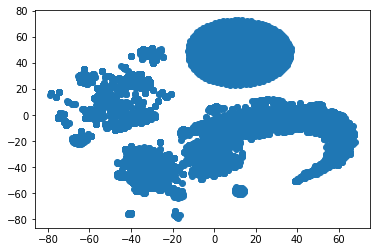

In [46]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)

plt.show()

In [341]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, max_iter=1200, algorithm = 'auto')
clusters = kmeans.fit_predict(feature)

In [342]:
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))

{0: 7719, 1: 981, 2: 215, 3: 2605}

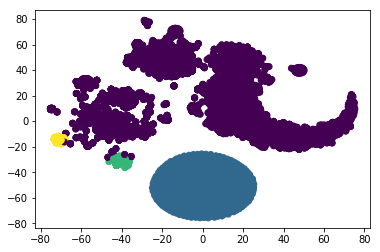

In [351]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=clusters)

plt.show()

In [353]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full',max_iter = 1000)
clusters = gmm.fit_predict(feature)
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))

{0: 5812, 1: 5708}

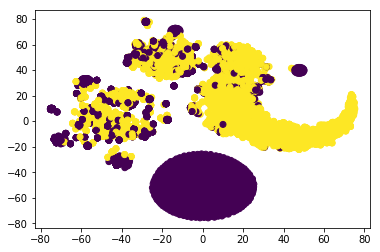

In [354]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=clusters)

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 10, min_samples=100)
clusters = dbscan.fit_predict(feature)
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))

In [ ]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=clusters)

plt.show()